In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Informasi Data Bangkrut

In [2]:
data_bangkrut = pd.read_csv('bangkrut.csv')
data_bangkrut.head(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


In [3]:
data_bangkrut.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [4]:
data_bangkrut.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [5]:
print(data_bangkrut.columns)

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

# Seleksi data data pendukung

In [6]:
data_pilihan = data_bangkrut[['Bankrupt?', ' Debt ratio %',' Non-industry income and expenditure/revenue',' Revenue per person', ' Net worth/Assets',' Interest-bearing debt interest rate']]

In [7]:
data_pilihan.head()

,Bankrupt?,Debt ratio %,Non-industry income and expenditure/revenue,Revenue per person,Net worth/Assets,Interest-bearing debt interest rate
0,1,0.207576,0.302646,0.034164,0.792424,0.000725
1,1,0.171176,0.303556,0.006889,0.828824,0.000647
2,1,0.207516,0.302035,0.028997,0.792484,0.000790
3,1,0.151465,0.303350,0.015463,0.848535,0.000449
4,1,0.106509,0.303475,0.058111,0.893491,0.000686


In [8]:
data_pilihan.isna().sum()

Bankrupt?                                       0
 Debt ratio %                                   0
 Non-industry income and expenditure/revenue    0
 Revenue per person                             0
 Net worth/Assets                               0
 Interest-bearing debt interest rate            0
dtype: int64

# Korelasi 

In [9]:
data_pilihan.corr()

,Bankrupt?,Debt ratio %,Non-industry income and expenditure/revenue,Revenue per person,Net worth/Assets,Interest-bearing debt interest rate
Bankrupt?,1.000000,0.250161,-0.016593,0.039718,-0.250161,-0.023063
Debt ratio %,0.250161,1.000000,-0.033214,0.037412,-1.000000,-0.059911
Non-industry income and expenditure/revenue,-0.016593,-0.033214,1.000000,-0.225032,0.033214,0.001332
Revenue per person,0.039718,0.037412,-0.225032,1.000000,-0.037412,-0.002586
Net worth/Assets,-0.250161,-1.000000,0.033214,-0.037412,1.000000,0.059911
Interest-bearing debt interest rate,-0.023063,-0.059911,0.001332,-0.002586,0.059911,1.000000


<AxesSubplot:>

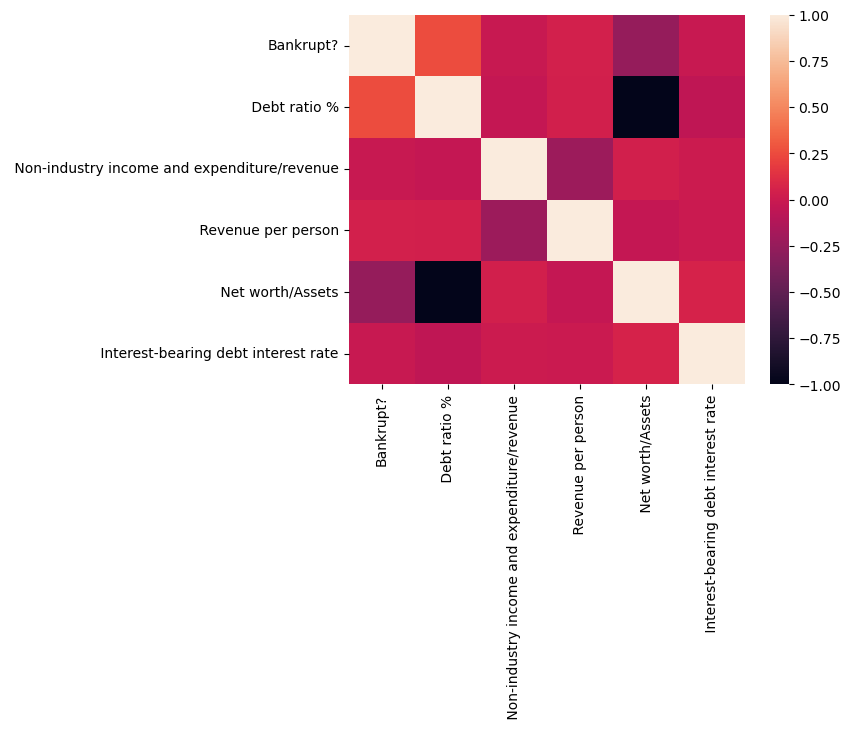

In [10]:
sns.heatmap(data_pilihan.corr())

<AxesSubplot:>

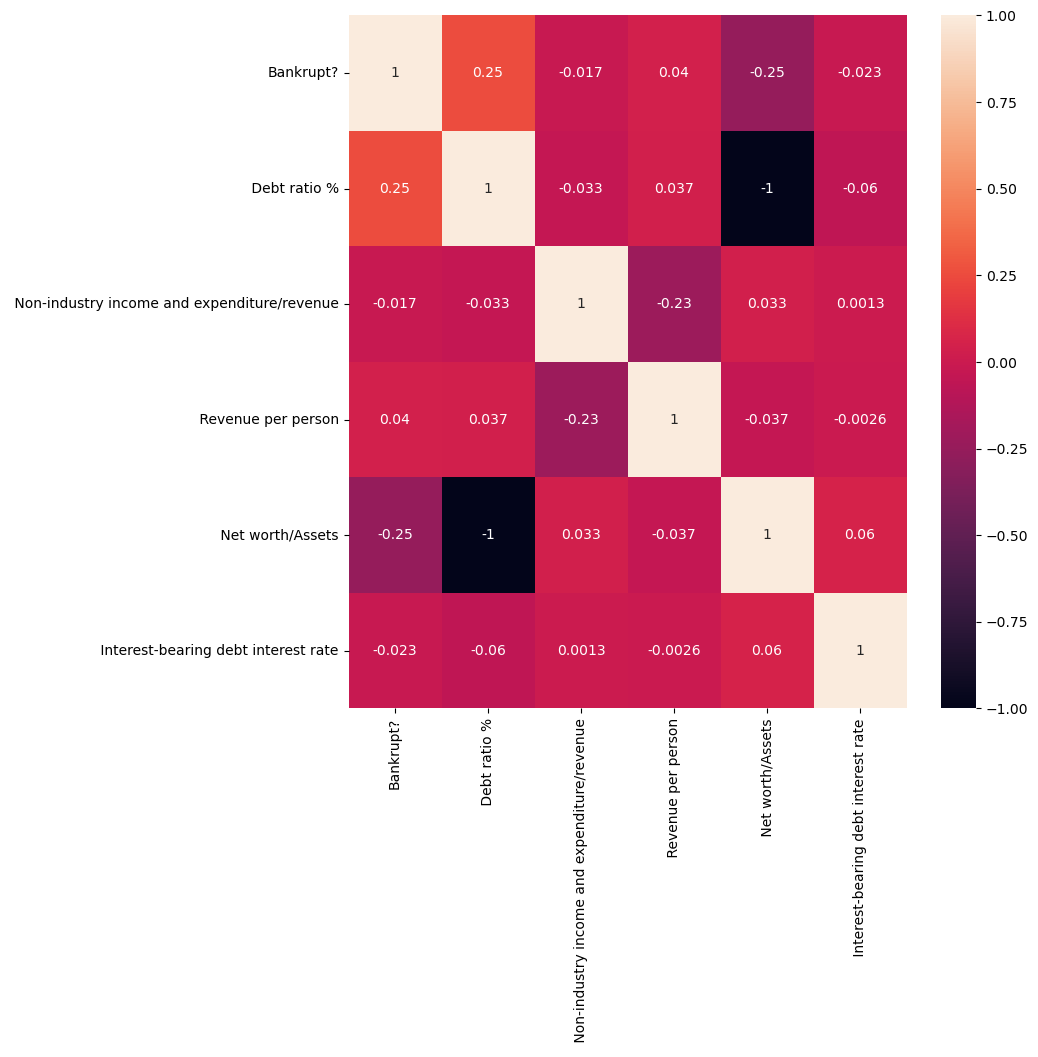

In [11]:
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(data_pilihan.corr(),ax=ax,annot=True)

# Split Train and Test untuk data pilihan

In [14]:
X = data_pilihan.drop(['Bankrupt?'],axis=1)
y = data_pilihan['Bankrupt?']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)